In [1]:
import ads
ads.hello()

OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k
OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k




  O  o-o   o-o
 / \ |  \ |
o---o|   O o-o
|   ||  /     |
o   oo-o  o--o

ADS SDK version: 2.8.1
Pandas version: 1.5.3
Debug mode: False



In [2]:
import oci
print(oci.__version__);

2.93.0


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["species"] = data.target

from ads.dataset.factory import DatasetFactory

# these two are equivalent:
ds = DatasetFactory.open(df, target="species")
# OR
ds = DatasetFactory.from_dataframe(df, target="species")

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
ds.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


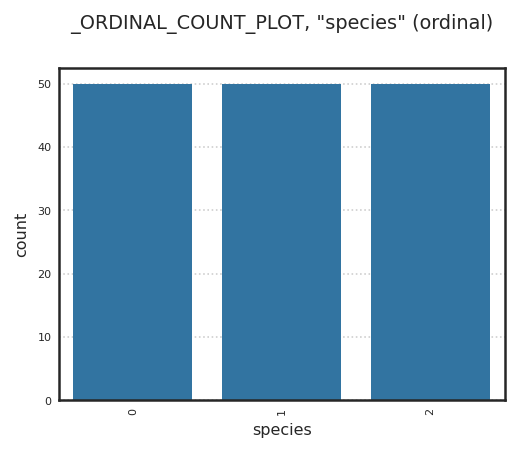

In [11]:
ds.target.show_in_notebook()

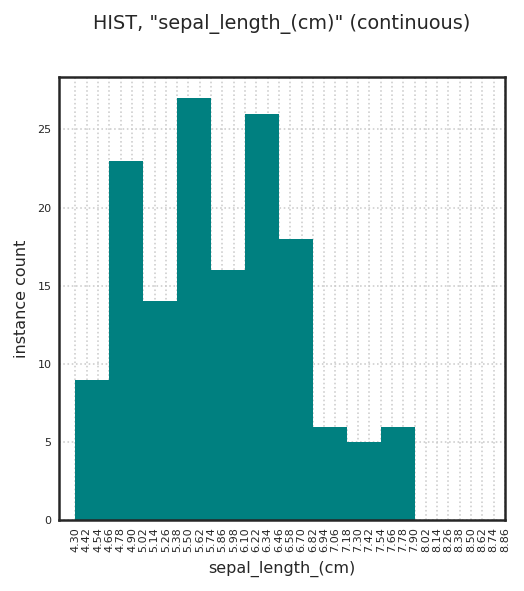

In [12]:
ds.plot("sepal_length_(cm)").show_in_notebook(figsize=(4,4))

In [23]:

from ads.common.auth import default_signer

ads.set_auth(auth="api_key", oci_config_location=oci.config.DEFAULT_LOCATION, profile="specialist2-4sdk")
bucket_name = "bucket-20220501-1555"
file_name = "iris.csv"
namespace = "ocichina001"
df = pd.read_csv(f"oci://{bucket_name}@{namespace}/{file_name}", storage_options=default_signer())
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [22]:
from ads.common.auth import default_signer

ads.set_auth(auth="api_key", oci_config_location=oci.config.DEFAULT_LOCATION, profile="specialist2-4sdk")
bucket_name = "bucket-20220501-1555"
file_name = "iris.csv"
namespace = "ocichina001"
storage_options = {'config':"~/.oci/config", 'profile': "specialist2-4sdk", 'tenancy': 'ocid1.tenancy.oc1..aaaaaaaavnk4luuiasjkuhiizwnwust2xx3td7b4cbj5vhiccb47hra26p4q', 'region': "ap-singapore-1"}
ds = DatasetFactory.open(f"oci://{bucket_name}@{namespace}/{file_name}", storage_options=storage_options)
ds.head()

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [25]:
bucket_name = "bucket-20220501-1555"
file_name = "iris.csv"
namespace = "ocichina001"

from ocifs import OCIFileSystem

fs = OCIFileSystem(config="~/.oci/config", profile="specialist2-4sdk", region="ap-singapore-1")
fsls = fs.ls(f"{bucket_name}@{namespace}")
print(fsls)

file = fs.open(f"oci://{bucket_name}@{namespace}/{file_name}")
buffer = file.read()
print(buffer)
file.close()

from dask import dataframe as dd

storage_options = {'config':"~/.oci/config", 'profile': "specialist2-4sdk", 'tenancy': 'ocid1.tenancy.oc1..aaaaaaaavnk4luuiasjkuhiizwnwust2xx3td7b4cbj5vhiccb47hra26p4q', 'region': "ap-singapore-1"}
ds = dd.read_csv(f"oci://{bucket_name}@{namespace}/{file_name}",
            storage_options=storage_options)
ds.head()


['bucket-20220501-1555@ocichina001/currybeef.mp4', 'bucket-20220501-1555@ocichina001/currybeefmovie202206031033', 'bucket-20220501-1555@ocichina001/iris', 'bucket-20220501-1555@ocichina001/iris.csv']
b'"sepal.length","sepal.width","petal.length","petal.width","variety"\n5.1,3.5,1.4,.2,"Setosa"\n4.9,3,1.4,.2,"Setosa"\n4.7,3.2,1.3,.2,"Setosa"\n4.6,3.1,1.5,.2,"Setosa"\n5,3.6,1.4,.2,"Setosa"\n5.4,3.9,1.7,.4,"Setosa"\n4.6,3.4,1.4,.3,"Setosa"\n5,3.4,1.5,.2,"Setosa"\n4.4,2.9,1.4,.2,"Setosa"\n4.9,3.1,1.5,.1,"Setosa"\n5.4,3.7,1.5,.2,"Setosa"\n4.8,3.4,1.6,.2,"Setosa"\n4.8,3,1.4,.1,"Setosa"\n4.3,3,1.1,.1,"Setosa"\n5.8,4,1.2,.2,"Setosa"\n5.7,4.4,1.5,.4,"Setosa"\n5.4,3.9,1.3,.4,"Setosa"\n5.1,3.5,1.4,.3,"Setosa"\n5.7,3.8,1.7,.3,"Setosa"\n5.1,3.8,1.5,.3,"Setosa"\n5.4,3.4,1.7,.2,"Setosa"\n5.1,3.7,1.5,.4,"Setosa"\n4.6,3.6,1,.2,"Setosa"\n5.1,3.3,1.7,.5,"Setosa"\n4.8,3.4,1.9,.2,"Setosa"\n5,3,1.6,.2,"Setosa"\n5,3.4,1.6,.4,"Setosa"\n5.2,3.5,1.5,.2,"Setosa"\n5.2,3.4,1.4,.2,"Setosa"\n4.7,3.2,1.6,.2,"Setosa"\

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
